In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab
from tqdm import trange
import scipy
from scipy.stats import bernoulli

In [2]:
def is_consensus(x, fix):
    res = True
    count = 0
    for i in range(1, len(x)):
        if x[i-1] != x[i]:
            count += 1
    if count > 2:
        res = False
    return res
def clusters(x0,eps2, fix = {}):
    count = [x0[0]]
    l=0
    for i in range(1,len(x0)):
        if i not in fix:
            for j in range (len(count)):
                if np.abs(x0[i] - count[j])<eps2:
                    l+=1
            if l==0:
                count.append(x0[i])
            l=0
    return np.array(count)

In [3]:
def compare (x ,y, eps):
    result = 1
    for k in range(len(x)):
        if abs(x[k] - y[k]) >= eps:
            result = 0
    return bool(result)

def insert_agent(x, ind):
    if  ind != 0:
        opinion = (x[ind]+x[ind-1])/2
    else:
        opinion = x[ind]
    _X = np.insert(x,ind,opinion)
    return _X

def new_op(x, i, eps):
    count = 1
    summ = x[i]
    for k in range(len(x)):
        if (abs(x[i] - x[k]) < eps) and (i != k):
            #print(i, j, x[i], x[j])
            summ += x[k]
            count += 1
    #print(summ, count)
    return summ/count

def pair_count (x0, fix = {}):
    count = [0, 0]
    for i in range(len(x0)):
        if i not in fix:
            if x0[i] >= 0.5:
                count[0] += 1
            else:
                count[1] += 1
    #count[0] = count[0]/len(x0)
    #count[1] = count[1] / len(x0)
    return count

def Hen_Kr (x0, eps, eps2,fix, v):
    X = [np.array(x0)]
    t = 0
    while True:
        X.append(np.zeros(len(x0)))
        t += 1
        for j in range(len(x0)):
            if j not in fix:
                X[t][j] = new_op(X[t - 1], j, eps)
            else:
                if X[t - 1][j] + v <= 1:
                    X[t][j] = X[t - 1][j] + v
                else:
                    X[t][j] = 1
        if compare(X[t], X[t - 1], eps2):
            break
    return X, t

def find_fix(x0):
    diff = 1
    ind = 0
    for j in range (len(x0)):
        if (x0[j] - 0.5 < diff) and (x0[j] - 0.5 >= 0):
            ind = j
            diff = abs(0.5 - x0[j])
    return ind

In [4]:

def Hen_Kr_actm2_statistics (x0, eps, eps2,fix, v, prob):
    X = [np.array(x0)]
    t = 0
    consensus_value = 0
    consensus_time = 0
    consensus_flag = True
    pos0_6_time = 0
    pos0_6_flag = True
    while True:
        X.append(np.zeros(len(x0)))
        active_mask = bernoulli.rvs(p=prob, size=n)
        t += 1
        for j in range(len(x0)):
            if j not in fix and active_mask[j]==1:
                X_prev = np.copy(X[t -1])
                X_prev[active_mask==0]=0-2*eps - 2*eps2 
                X[t][j] = new_op(X_prev, j, eps)
                X[t][active_mask==0]=X[t-1][active_mask==0]
            else:
                if X[t - 1][j] + v <= 1:
                    X[t][j] = X[t - 1][j] + v
                else:
                    X[t][j] = 1
        if consensus_flag:
            ctrs = clusters(X[t],eps,fix_control)
            if len(ctrs) ==1:
                consensus_flag = False
                consensus_time = t
                consensus_value = X[t][0]
        if pos0_6_flag and np.all(X[t]>= 0.6):
            pos0_6_time = t
            pos0_6_flag = False
        if compare(X[t], X[t - 1], eps2):
            break
    return X, t, consensus_value, consensus_time, pos0_6_time

In [5]:
print('number of agents: ')
#n = int(input())
n = 50
print(n)
eps = 0.2
eps2 = 0.001

number of agents: 
50


In [23]:
# np.random.seed(111)
x0 = np.random.sample(n)
x0.sort()
#x0 = np.linspace(0, 1, num=n)

In [24]:
start = pair_count(x0)
print('Initial set: ', x0)
start

Initial set:  [0.00428021 0.00576958 0.03388937 0.04781131 0.05567227 0.07942884
 0.08852673 0.10260168 0.11495293 0.11507268 0.18319368 0.18695742
 0.20776348 0.2202921  0.2360144  0.26807378 0.30549047 0.34141931
 0.34418464 0.38546902 0.40407414 0.43568855 0.46391002 0.47863116
 0.5492265  0.55462512 0.58789353 0.58939223 0.59566176 0.62261163
 0.63487461 0.66289796 0.68778238 0.69403146 0.69941141 0.77273455
 0.77292673 0.79122396 0.80304632 0.83296331 0.86995822 0.87457586
 0.88984662 0.9127794  0.92620417 0.95640856 0.95664901 0.96643674
 0.98703502 0.99277835]


[26, 24]

In [28]:
fix_control = set({})
v_c = 0
X_control, t_control = Hen_Kr(x0,eps,eps2,fix_control, v_c)
finish_c = pair_count(X_control[t_control])
t_c_list = np.linspace(0, t_control, t_control + 1)

In [29]:
prob=0.5
X, t, cons_value, cons_time, positive_time = Hen_Kr_actm2_statistics(x0, eps, eps2, fix_control,v_c, prob)
cltrs = clusters(X[t],eps,fix_control)
finish = pair_count(X[t])
t_list = np.linspace(0, t, t + 1)

print('Consensus time:', cons_time)
print('Consensus value in consensus time:', cons_value)
print('Time when opinions reaches value 0.6:', positive_time)
print('Number of clusters:', len(cltrs))
print('Clusters:\n', cltrs)
print(start, finish_c, finish)


Consensus time: 0
Consensus value in consensus time: 0
Time when opinions reaches value 0.6: 0
Number of clusters: 3
Clusters:
 [0.1808499  0.46103458 0.75230262]
[26, 24] [30, 20] [28, 22]


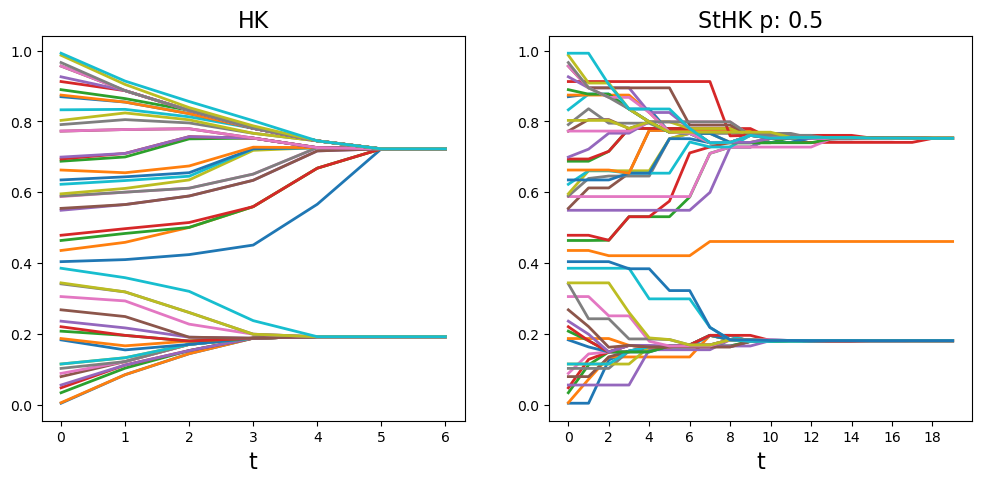

In [31]:
fig = plt.figure(facecolor='white', figsize=(12, 5))

font=16
ax1 = fig.add_subplot(121)
ax1.plot(t_c_list, X_control, linewidth=2)

ax1.set_title('HK', fontsize=font)
ax1.set_xlabel('t', fontsize=font)
ax1.set_xticks(t_c_list)
#ax1.set_ylabel('opinion', fontsize=font)

ax2 = fig.add_subplot(122)
ax2.plot(t_list, X, linewidth=2)

ax2.set_title(f'StHK p: {prob}', fontsize=font)
ax2.set_xlabel('t', fontsize=font)
ax2.set_xticks(t_list[::2])
#ax2.set_ylabel('opinion', fontsize=font)
plt.show()
plt.show()

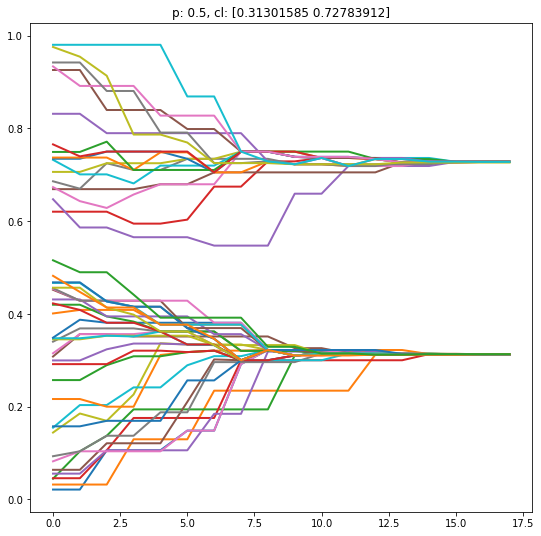

In [13]:
fig = plt.figure(facecolor='white', figsize=(9, 9))

ax2 = fig.add_subplot()
ax2.plot(t_list, X, linewidth=2)

ax2.title.set_text(f'p: {prob}, cl: {cltrs}')
plt.show()

In [14]:
'''array([0.04342253, 0.04505658, 0.04767897, 0.05438947, 0.08183921,
       0.15579879, 0.18273207, 0.19907248, 0.20086458, 0.22110884,
       0.23154495, 0.26586475, 0.26724375, 0.27834147, 0.28444466,
       0.34029151, 0.34361759, 0.34625504, 0.38140319, 0.42837401,
       0.42961362, 0.43633334, 0.45728062, 0.48381291, 0.48772876,
       0.50120715, 0.52436766, 0.52794832, 0.53306094, 0.55034556,
       0.56071333, 0.57380503, 0.57451855, 0.59648049, 0.61399537,
       0.64339069, 0.65603523, 0.67663165, 0.69775947, 0.73194422,
       0.75202105, 0.78525014, 0.7925176 , 0.80582856, 0.83707945,
       0.90580853, 0.91841235, 0.93432005, 0.94120001, 0.9944352 ])'''

'array([0.04342253, 0.04505658, 0.04767897, 0.05438947, 0.08183921,\n       0.15579879, 0.18273207, 0.19907248, 0.20086458, 0.22110884,\n       0.23154495, 0.26586475, 0.26724375, 0.27834147, 0.28444466,\n       0.34029151, 0.34361759, 0.34625504, 0.38140319, 0.42837401,\n       0.42961362, 0.43633334, 0.45728062, 0.48381291, 0.48772876,\n       0.50120715, 0.52436766, 0.52794832, 0.53306094, 0.55034556,\n       0.56071333, 0.57380503, 0.57451855, 0.59648049, 0.61399537,\n       0.64339069, 0.65603523, 0.67663165, 0.69775947, 0.73194422,\n       0.75202105, 0.78525014, 0.7925176 , 0.80582856, 0.83707945,\n       0.90580853, 0.91841235, 0.93432005, 0.94120001, 0.9944352 ])'

In [15]:
cons_value_data = np.asarray([])
cons_time_data = np.asarray([])
positive_time_data = np.asarray([])
stop_time_data = np.asarray([])
cluster_numbers = np.asarray([])
cluster_diff = np.array([])

count_experiments = 20
count_activ = 25
prob=0.5

In [16]:
def clust_diff(cl_c,cl):
    if len(cl_c)==len(cl):
        diff = cl-cl_c
        #print(diff)
        return diff

In [17]:
for i in trange(count_experiments):
    
    x0 = np.random.sample(n)
    x0.sort()
    
    X_control, t_control = Hen_Kr(x0,eps,eps2,fix_control, v_c)
    cl_control = clusters(X_control[t_control],eps,fix_control)
    
    for j in range(count_activ):
        
        X, t, cons_value, cons_time, positive_time = Hen_Kr_actm2_statistics(x0, eps, eps2, fix_control,v_c, prob)
        cltrs = clusters(X[t],eps,fix_control)
    
        cons_value_data = np.append(cons_value_data, cons_value)
        cons_time_data = np.append(cons_time_data, cons_time)
        positive_time_data = np.append(positive_time_data, positive_time)
        stop_time_data = np.append(stop_time_data, t)
        cluster_numbers = np.append(cluster_numbers, len(cltrs))
        
        if(len(cl_control)==len(cltrs)):
            diff = clust_diff(cl_control, cltrs)
            cluster_diff = np.append(cluster_diff, diff)
    
print('Average consensus time:', np.mean(cons_time_data))
print('Average consensus value in consensus time:', np.mean(cons_value_data))
print('Average time when consensus reached 0.6:', np.mean(positive_time_data))
print('Average stop time:', np.mean(stop_time_data))
print('Average number of clusters:', np.mean(cluster_numbers))
print('Average difference:', np.mean(cluster_diff[0::2]), np.mean(cluster_diff[1::2]))

count_coin = 0.
count_all = 0.
for i in range(count_experiments):
    if cons_time_data[i]!=0:
        count_all +=1
        if cons_time_data[i] == positive_time_data[i]:
            count_coin += 1
print(count_coin, count_all)
print('Percentage of consensus formation with value above 0.6:', count_coin / count_experiments)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.26it/s]

Average consensus time: 0.198
Average consensus value in consensus time: 0.003551089745087112
Average time when consensus reached 0.6: 0.0
Average stop time: 19.166
Average number of clusters: 2.138
Average difference: -0.005933497042845777 0.01524122461355199
0.0 0.0
Percentage of consensus formation with value above 0.6: 0.0


In [18]:
cluster_diff

array([-7.70532366e-03,  9.28492815e-03, -1.19023851e-03, -1.12959140e-02,
        6.85925779e-03, -2.78685640e-04, -5.27681106e-03,  1.45566347e-02,
        1.42866557e-02, -4.61520145e-04, -2.31588327e-02, -2.20817829e-02,
        2.15535406e-04,  8.35239857e-03,  1.48808475e-03,  9.81346294e-03,
       -7.72803630e-03,  4.47113343e-03, -1.49382795e-02, -8.31062935e-03,
       -1.54348247e-03,  6.96976419e-04,  2.74152247e-03,  1.22396622e-02,
       -1.03454806e-02,  1.59236230e-02,  2.75658671e-03,  5.51032477e-03,
       -3.19330366e-03,  6.96640633e-03, -1.15546021e-02,  1.78135402e-02,
        2.77936021e-02,  3.31875223e-04, -1.26467533e-02,  1.57807066e-02,
       -4.12849092e-03,  7.05137797e-03, -6.91521555e-02, -3.08544599e-03,
       -6.52560617e-02, -1.58772149e-02, -3.34158827e-02,  1.45090365e-02,
       -2.39136676e-02, -3.55458180e-03, -3.66495280e-02, -1.01189136e-02,
        6.15057731e-02,  1.02334325e-01,  1.60536579e-02, -5.05313645e-02,
       -5.11940658e-02, -

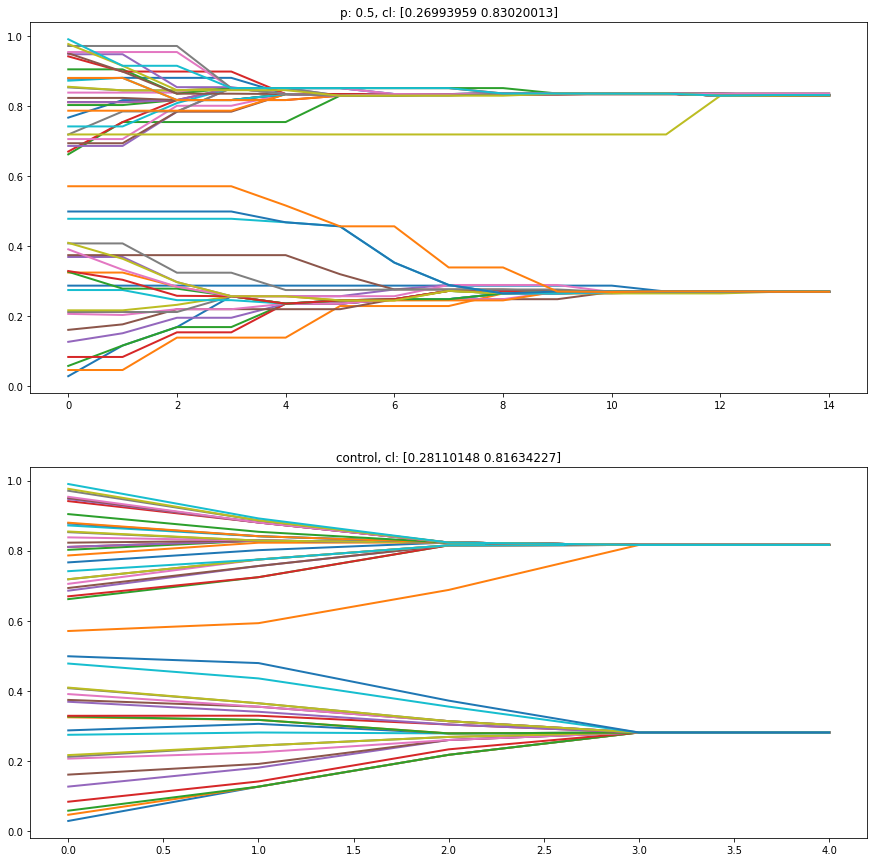

In [19]:
fig = plt.figure(facecolor='white', figsize=(6, 15))

t_list = np.linspace(0, t, t + 1)
t_c_list = np.linspace(0, t_control, t_control + 1)

ax = fig.add_subplot(211)
ax.plot(t_list, X, linewidth=2)

ax2 = fig.add_subplot(212)
ax2.plot(t_c_list, X_control, linewidth=2)

ax.title.set_text(f'p: {prob}, cl: {cltrs}')
ax2.title.set_text(f'control, cl: {cl_control}')
plt.show()

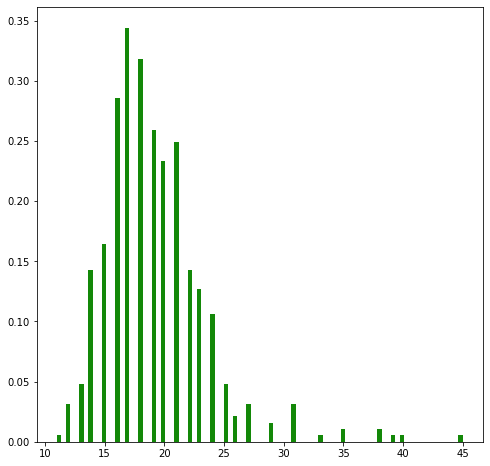

In [22]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(stop_time_data, density = True, bins=90, stacked = True, color = '#138808')
plt.show()

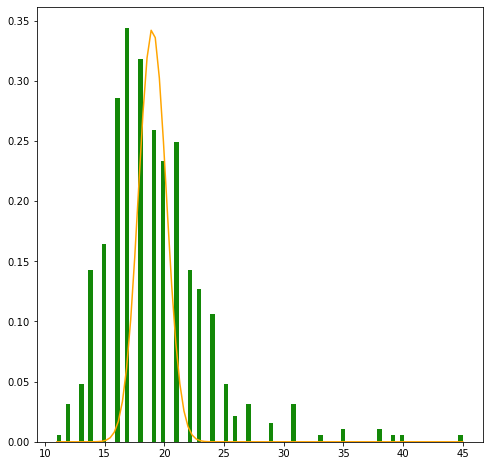

KstestResult(statistic=0.356, pvalue=1.5744084636023734e-28)

In [23]:
import scipy.stats as stats

fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(stop_time_data, density = True, bins=90, stacked = True, color = '#138808')

x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.norm.pdf(x, 19, 1/(2.5*max(hist[0]))), color ="orange")

plt.show()
stats.ks_2samp(stats.norm.rvs(19,1/(2.4*max(hist[0])), size=len(stop_time_data)),stop_time_data, mode='auto')

KstestResult(statistic=0.992, pvalue=3.0646634574354925e-289)

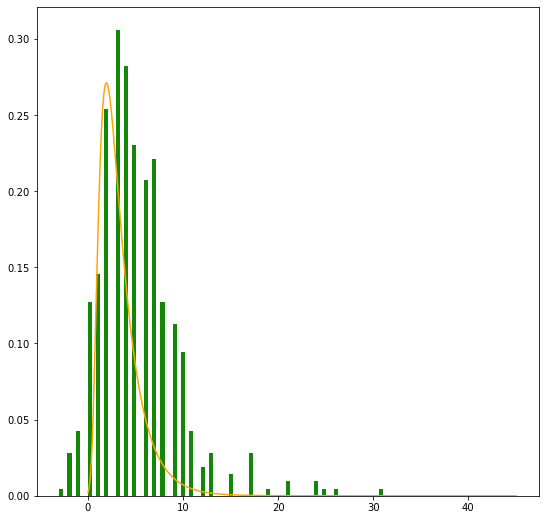

In [48]:
fig = plt.figure(facecolor='white', figsize=(9, 9))
hist1 = plt.hist(stop_time_data - hist[1].min()-3, density = True, bins=80, stacked = True, color = '#138808')
distribution = np.linspace(hist[0].min(), hist[1].max(),num=1000) 
     
plot = plt.plot(distribution,stats.norminvgauss(9,8.62).pdf(distribution),color ="orange") 
stats.ks_2samp(stats.norminvgauss.rvs(9,8.62, size=len(stop_time_data)),stop_time_data, mode='auto')

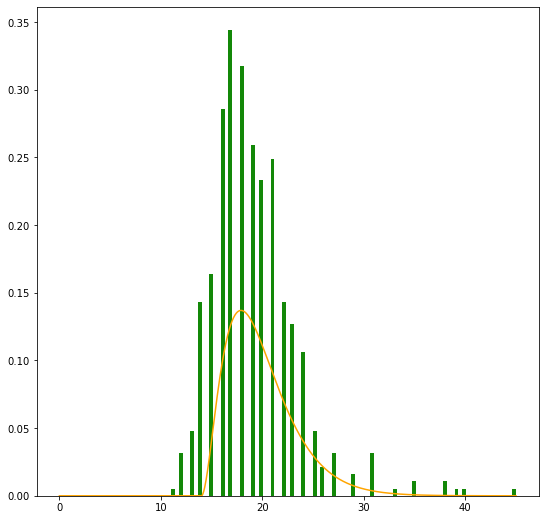

In [49]:
fig = plt.figure(facecolor='white', figsize=(9, 9))
hist1 = plt.hist(stop_time_data, density = True, bins=90, stacked = True, color = '#138808')
distribution = np.linspace(hist[0].min(), hist[1].max(),num=1000) 
     
plot = plt.plot(distribution,stats.chi2(5.9, 14).pdf(distribution),color ="orange") 

In [50]:
cons_value_data = np.asarray([])
cons_time_data = np.asarray([])
positive_time_data = np.asarray([])
stop_time_data = np.asarray([])
cluster_numbers = np.asarray([])
cluster_diff = np.array([])

In [51]:
for i in trange(count_experiments):
    
    x0 = np.random.sample(n)
    x0.sort()
    
    X_control, t_control = Hen_Kr(x0,eps,eps2,fix_control, v_c)
    cl_control = clusters(X_control[t_control],eps,fix_control)
    
    for j in range(count_activ):
        
        X, t, cons_value, cons_time, positive_time = Hen_Kr_actm2_statistics(x0, eps, eps2, fix_control,v_c, prob)
        cltrs = clusters(X[t],eps,fix_control)
    
        cons_value_data = np.append(cons_value_data, cons_value)
        cons_time_data = np.append(cons_time_data, cons_time)
        positive_time_data = np.append(positive_time_data, positive_time)
        stop_time_data = np.append(stop_time_data, t)
        cluster_numbers = np.append(cluster_numbers, len(cltrs))
        
        if(len(cl_control)==len(cltrs)):
            diff = clust_diff(cl_control, cltrs)
            cluster_diff = np.append(cluster_diff, diff)
    
print('Average consensus time:', np.mean(cons_time_data))
print('Average consensus value in consensus time:', np.mean(cons_value_data))
print('Average time when consensus reached 0.6:', np.mean(positive_time_data))
print('Average stop time:', np.mean(stop_time_data))
print('Average number of clusters:', np.mean(cluster_numbers))
print('Average difference:', np.mean(cluster_diff[0::2]), np.mean(cluster_diff[1::2]))

count_coin = 0.
count_all = 0.
for i in range(count_experiments):
    if cons_time_data[i]!=0:
        count_all +=1
        if cons_time_data[i] == positive_time_data[i]:
            count_coin += 1
print(count_coin, count_all)
print('Percentage of consensus formation with value above 0.6:', count_coin / count_experiments)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.29it/s]

Average consensus time: 0.354
Average consensus value in consensus time: 0.011269740435955387
Average time when consensus reached 0.6: 0.0
Average stop time: 19.436
Average number of clusters: 2.252
Average difference: 0.002209526132232661 0.006371137001069334
0.0 1.0
Percentage of consensus formation with value above 0.6: 0.0


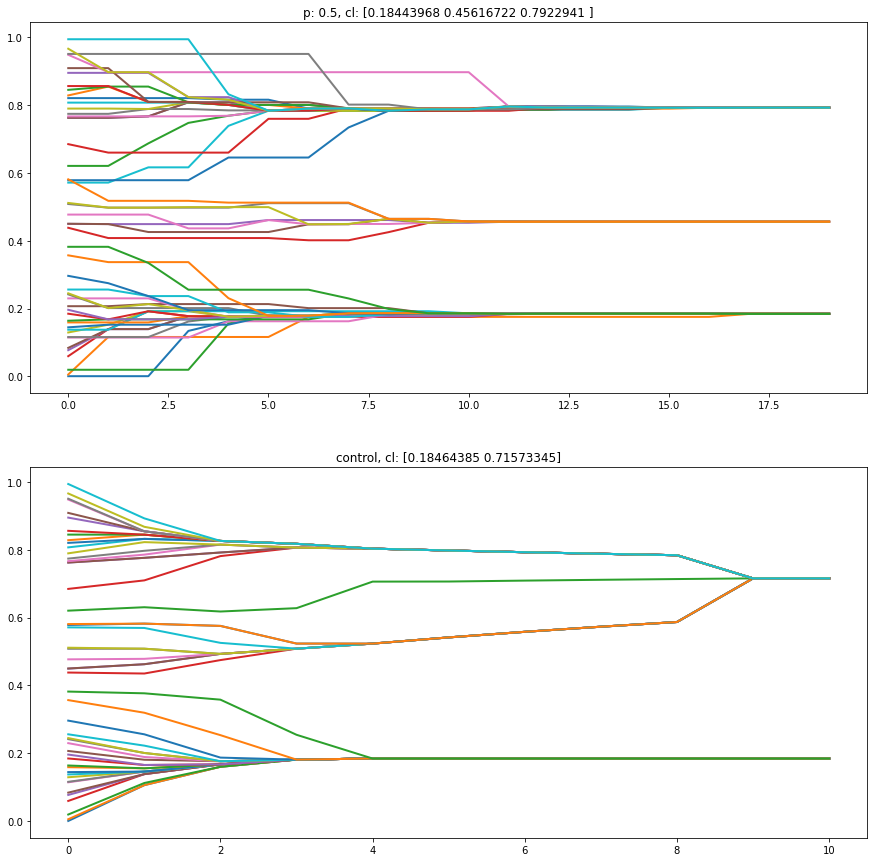

In [52]:
fig = plt.figure(facecolor='white', figsize=(15, 15))

t_list = np.linspace(0, t, t + 1)
t_c_list = np.linspace(0, t_control, t_control + 1)

ax = fig.add_subplot(211)
ax.plot(t_list, X, linewidth=2)

ax2 = fig.add_subplot(212)
ax2.plot(t_c_list, X_control, linewidth=2)

ax.title.set_text(f'p: {prob}, cl: {cltrs}')
ax2.title.set_text(f'control, cl: {cl_control}')
plt.show()

**Гистограмма распределения времени работы модели**

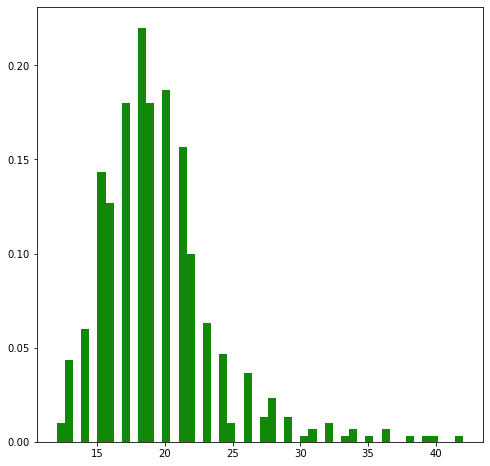

In [53]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(stop_time_data, density = True, bins=50, stacked = True, color = '#138808')
plt.show()

**Нормальное распределение**

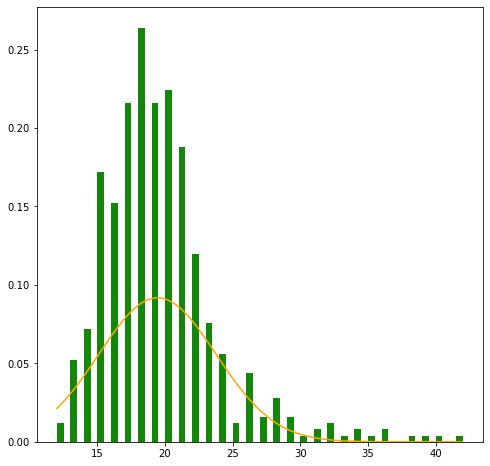

KstestResult(statistic=0.156, pvalue=1.0005427918861649e-05)

In [57]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(stop_time_data, density = True, bins=60, stacked = True, color = '#138808')

x = np.linspace(hist[1].min(), hist[1].max(), num=100)
a, b = scipy.stats.norm.fit(stop_time_data)
plt.plot(x, stats.norm.pdf(x, a, b), color ="orange")

plt.show()
stats.ks_2samp(stats.norm.rvs(a,b, size=len(stop_time_data)),stop_time_data, mode='auto')

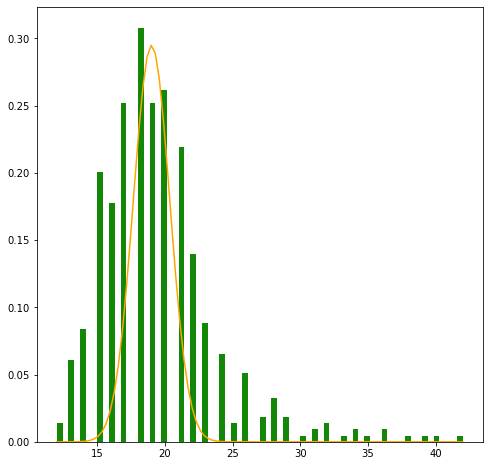

KstestResult(statistic=0.262, pvalue=1.7187432593506633e-15)

In [63]:
import scipy.stats as stats

fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(stop_time_data, density = True, bins=70, stacked = True, color = '#138808')

x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.norm.pdf(x, 19,1/(2.4*max(hist[0]))), color ="orange")

plt.show()
stats.ks_2samp(stats.norm.rvs(19,1/(2.4*max(hist[0])), size=len(stop_time_data)),stop_time_data, mode='auto')

In [60]:
from scipy.stats import ks_2samp

stats.ks_2samp(stop_time_data,stats.norm.pdf(x, 18, 2.2))

KstestResult(statistic=1.0, pvalue=0.0)

In [61]:
np.mean(stop_time_data), np.var(stop_time_data)


(19.436, 18.893904000000003)

**Обратное распределение Гаусса (гистограмма сдвинута к 0)**

KstestResult(statistic=0.996, pvalue=3.696054243816209e-294)

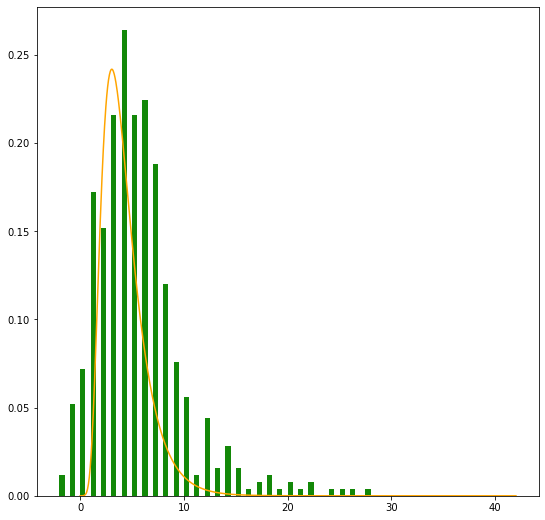

In [69]:
fig = plt.figure(facecolor='white', figsize=(9, 9))
hist1 = plt.hist(stop_time_data - hist[1].min()-2, density = True, bins=60, stacked = True, color = '#138808')
distribution = np.linspace(hist[0].min(), hist[1].max(),num=1000) 
     
plot = plt.plot(distribution,stats.norminvgauss(19,18.5).pdf(distribution),color ="orange") 
stats.ks_2samp(stats.norminvgauss.rvs(19,18.5, size=len(stop_time_data)),stop_time_data, mode='auto')

In [31]:
stats.ks_2samp(stop_time_data,stats.norminvgauss.pdf(x, 18, 17.758))


KstestResult(statistic=1.0, pvalue=0.0)

In [32]:
stats.ks_2samp(stats.norminvgauss.pdf(x, 18, 17.758),stats.norminvgauss.pdf(x, 18, 17.758))

KstestResult(statistic=0.0, pvalue=1.0)

**Распределение хи^2**

KstestResult(statistic=0.26, pvalue=2.931154045000726e-15)

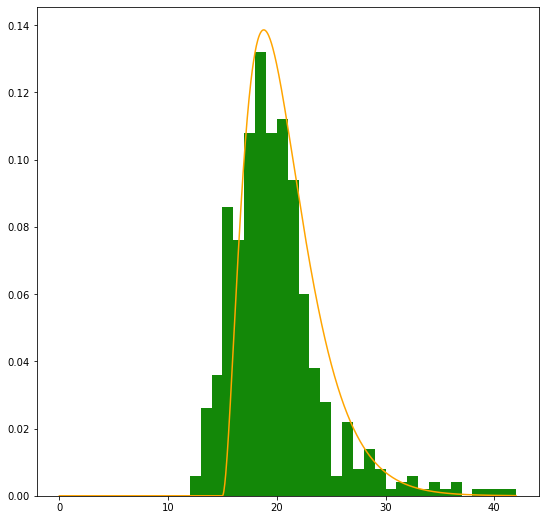

In [73]:
fig = plt.figure(facecolor='white', figsize=(9, 9))
hist1 = plt.hist(stop_time_data, density = True, bins='auto', stacked = True, color = '#138808')
distribution = np.linspace(hist[0].min(), hist[1].max(),num=1000) 
     
plot = plt.plot(distribution,stats.chi2(5.8, 15).pdf(distribution),color ="orange") 
stats.ks_2samp(stats.chi2.rvs(5.8, 15, size=len(stop_time_data)),stop_time_data, mode='auto')

In [34]:
stats.ks_2samp(stop_time_data,stats.chi2.pdf(x,4.8, 15))

KstestResult(statistic=1.0, pvalue=0.0)

**Распределение Эрланга**

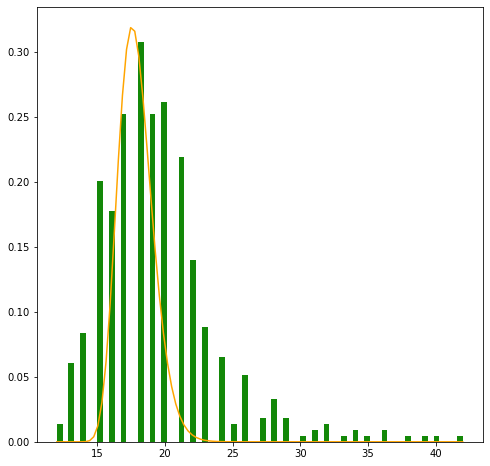

KstestResult(statistic=0.374, pvalue=1.6183566797042026e-31)

In [90]:

fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(stop_time_data, density = True, bins=70, stacked = True, color = '#138808')

x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.erlang.pdf(x, 17, 12.6, 0.31), color ="orange")

plt.show()
stats.ks_2samp(stats.erlang.rvs(17, 12.6, 0.31, size=len(stop_time_data)),stop_time_data, mode='auto')

**Гамма распределение**

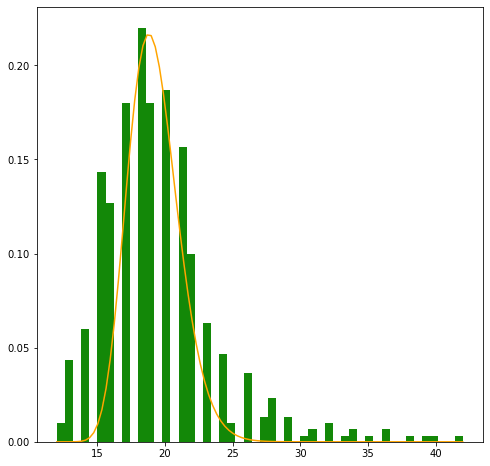

KstestResult(statistic=0.21, pvalue=4.602215863108133e-10)

In [96]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(stop_time_data, density = True, bins=50, stacked = True, color = '#138808')

x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.gamma.pdf(x, 21, 10.6, 0.41), color ="orange")

plt.show()
stats.ks_2samp(stats.gamma.rvs(21, 10.6, 0.41, size=len(stop_time_data)),stop_time_data, mode='auto')

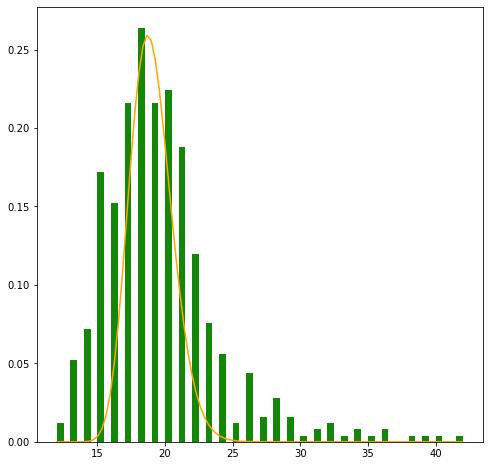

KstestResult(statistic=0.26, pvalue=2.931154045000726e-15)

In [101]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(stop_time_data, density = True, bins=60, stacked = True, color = '#138808')

x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.gamma.pdf(x, 29, 10.6, 0.29), color ="orange")

plt.show()
stats.ks_2samp(stats.gamma.rvs(29, 10.6, 0.29, size=len(stop_time_data)),stop_time_data, mode='auto')

**Распределение lognorm**

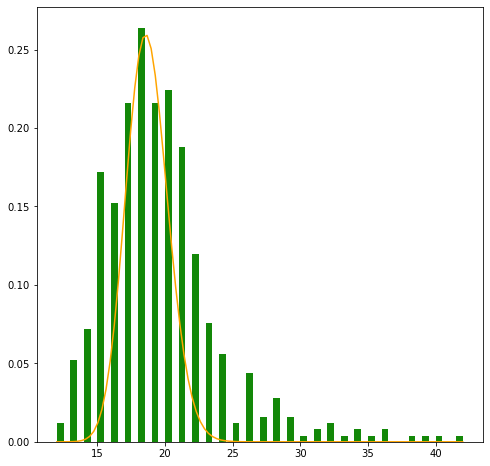

KstestResult(statistic=0.25, pvalue=3.965544288292721e-14)

In [140]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(stop_time_data, density = True, bins=60, stacked = True, color = '#138808')

x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.lognorm.pdf(x, 0.06, -7, 25.65), color ="orange")

plt.show()
stats.ks_2samp(stats.lognorm.rvs(0.06, -7, 25.65, size=len(stop_time_data)),stop_time_data, mode='auto')

**Распределение Extreme Value**

C:\Users\anast\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_continuous_distns.py:2492: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


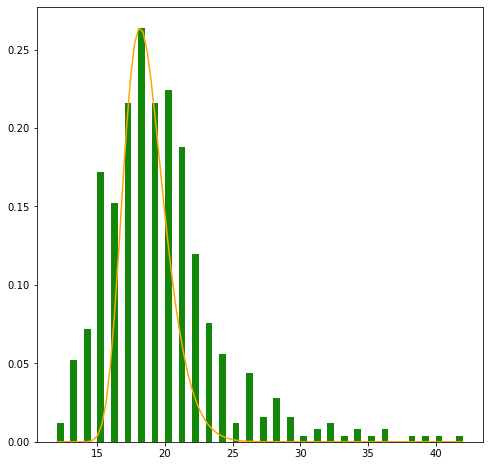

In [151]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(stop_time_data, density = True, bins=60, stacked = True, color = '#138808')

x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.genextreme.pdf(x, 0.1, 18, 1.4), color ="orange")

plt.show()

In [44]:
stats.ks_2samp(stop_time_data,stats.genextreme.pdf(x, 0.001, 18, 2.0))

KstestResult(statistic=1.0, pvalue=0.0)

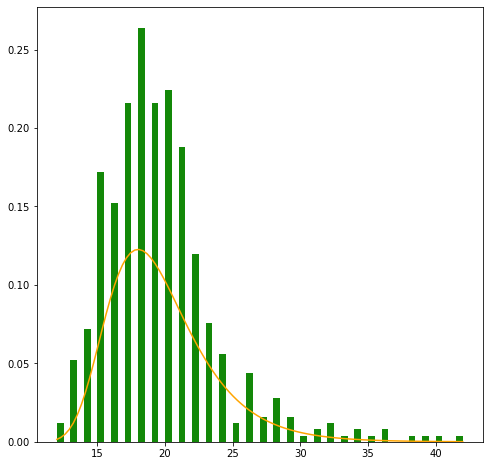

In [152]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(stop_time_data, density = True, bins=60, stacked = True, color = '#138808')

x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.genextreme.pdf(x, 0.001, 18, 3.0), color ="orange")

plt.show()

In [46]:
stats.ks_2samp(stop_time_data,stats.genextreme.pdf(x, 0.001, 18, 3.0))

KstestResult(statistic=1.0, pvalue=0.0)

In [47]:
cons_value_data = np.asarray([])
cons_time_data = np.asarray([])
positive_time_data = np.asarray([])
stop_time_data = np.asarray([])
cluster_numbers = np.asarray([])
cluster_diff = np.array([])

In [48]:
for i in trange(count_experiments):
    
    x0 = np.random.sample(n)
    x0.sort()
    
    X_control, t_control = Hen_Kr(x0,eps,eps2,fix_control, v_c)
    cl_control = clusters(X_control[t_control],eps,fix_control)
    
    for j in range(count_activ):
        
        X, t, cons_value, cons_time, positive_time = Hen_Kr_actm2_statistics(x0, eps, eps2, fix_control,v_c, prob)
        cltrs = clusters(X[t],eps,fix_control)
    
        cons_value_data = np.append(cons_value_data, cons_value)
        cons_time_data = np.append(cons_time_data, cons_time)
        positive_time_data = np.append(positive_time_data, positive_time)
        stop_time_data = np.append(stop_time_data, t)
        cluster_numbers = np.append(cluster_numbers, len(cltrs))
        
        if(len(cl_control)==len(cltrs)):
            diff = clust_diff(cl_control, cltrs)
            cluster_diff = np.append(cluster_diff, diff)
cluster_diff = np.array(cluster_diff)   
print('Average consensus time:', np.mean(cons_time_data))
print('Average consensus value in consensus time:', np.mean(cons_value_data))
print('Average time when consensus reached 0.6:', np.mean(positive_time_data))
print('Average stop time:', np.mean(stop_time_data))
print('Average number of clusters:', np.mean(cluster_numbers))
print('Average difference:', np.mean(cluster_diff[0::2]), np.mean(cluster_diff[1::2]))

count_coin = 0.
count_all = 0.
for i in range(count_experiments):
    if cons_time_data[i]!=0:
        count_all +=1
        if cons_time_data[i] == positive_time_data[i]:
            count_coin += 1
print(count_coin, count_all)
print('Percentage of consensus formation with value above 0.6:', count_coin / count_experiments)

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

[-0.09089004 -0.12914451]
[-0.10145388 -0.11862319]
[0.01368875 0.00754276]
[ 0.00035968 -0.01335706]
[-0.00698314 -0.006485  ]
[ 0.01471436 -0.00090697]
[-0.01218942  0.00771586]
[-0.01194139 -0.01372284]
[0.00248544 0.00912494]
[-0.01797979  0.0012941 ]
[0.01097681 0.02196874]
[0.01687798 0.01652061]
[ 0.00063566 -0.03262726]
[-0.00701534  0.0012749 ]
[-0.02098687  0.00859252]
[-0.10308691 -0.11956952]
[-0.07206779 -0.12183021]
[-0.00219417  0.00968969]
[-0.00704534 -0.00437759]


  5%|████▏                                                                              | 1/20 [00:00<00:09,  1.93it/s]

[ 0.00879628 -0.0193103 ]
[ 0.00202886 -0.01539224]
[-0.10208372 -0.09999595]
[-0.00917095 -0.01005802]
[0.01033487]
[0.00198554]


 10%|████████▎                                                                          | 2/20 [00:01<00:09,  1.90it/s]

[-0.01120797  0.01088238]
[0.01906832 0.00227781]
[-0.04094677  0.00483838]
[-0.02109259  0.01369852]
[ 0.02536891 -0.01350211]
[ 0.00340042 -0.00977873]
[-0.04814068 -0.15315335]
[0.00755688 0.01405077]
[-0.03327683 -0.00365241]
[0.0042706  0.00196883]
[-0.00363749  0.00202188]
[-0.02032371  0.00073708]
[-0.010695    0.01086912]
[-0.02094998  0.0168356 ]
[-0.06604289 -0.01594566]
[-0.00993087  0.02214144]
[-0.02118869 -0.22730403]


 15%|████████████▍                                                                      | 3/20 [00:01<00:09,  1.83it/s]

[-0.00828928  0.02005744]
[-0.01903352  0.03331226]
[-0.01941728 -0.01464653]
[-0.00492228 -0.00345888  0.05793542]
[ 0.0085456   0.10983516 -0.42512693]
[ 0.00853844 -0.00534622  0.03862234]
[-0.00513115 -0.05564818 -0.04053935]
[-0.00260461 -0.01607995  0.03248354]
[ 0.03099416 -0.01363567  0.02903531]
[-0.0195628   0.00058742 -0.00773726]
[ 0.01102428 -0.01038483 -0.0048018 ]
[-0.01369631  0.01969609  0.00560441]
[-0.01577793  0.038152   -0.01063894]
[-0.03048773 -0.04670367  0.02785812]
[ 0.01210439 -0.0299014   0.01613324]


 20%|████████████████▌                                                                  | 4/20 [00:02<00:08,  1.90it/s]

[-0.0078055  -0.00155409  0.0688418 ]
[-0.01689306  0.01217228 -0.01104694]
[-0.00689577  0.02683939  0.06881776]
[-0.03914423 -0.0073254  -0.01044814]
[ 0.05748576 -0.01869235]
[-0.01420485 -0.01458308]
[-0.0090136   0.01127929]
[0.02074131 0.03714   ]
[-0.00273727  0.01259879]
[ 0.01471765 -0.01733646]
[0.0253974  0.02544262]
[ 0.02332559 -0.01220931]
[0.01446604 0.01260726]
[-0.0014195   0.01419137]
[-0.0189859  0.008127 ]
[0.02807765 0.04561362]
[-0.02624121 -0.017505  ]
[0.01541104 0.05409202]
[0.00605153 0.00632989]
[-0.03124376  0.01312867]


 25%|████████████████████▊                                                              | 5/20 [00:02<00:07,  1.99it/s]

[0.04597525 0.01001067]
[-0.01015997 -0.01139693]
[0.00758782 0.04831622]
[0.02376097 0.04097372]
[-0.02569863  0.01820373]
[-0.01559469  0.00962994]
[-0.00816226 -0.00453023]
[-0.02083257  0.00898087]
[0.0338757  0.00838031]
[0.0099949  0.00044858]
[-0.00484069  0.00551428]
[-0.02667782  0.01297487]
[ 0.01559725 -0.00830417]
[0.00011787 0.00074646]
[-0.00557748  0.00686298]
[-0.01687726  0.00463869]
[-0.01311123  0.0019578 ]
[-0.01566643  0.01414889]
[0.00136525 0.01605164]
[-0.01932685 -0.01154151]
[-0.01487989  0.00790402]
[ 0.05070059 -0.01736087]
[-0.0122116   0.00219523]
[ 0.01846849 -0.02160598]


 30%|████████████████████████▉                                                          | 6/20 [00:03<00:06,  2.08it/s]

[ 0.05588975 -0.04570065]
[-0.02679056 -0.01211205]
[ 0.0227493  -0.01404956]
[-0.0040409   0.00501761]
[-0.0056586   0.00423653]
[-0.0570495  -0.05014149]
[0.00609744 0.00349978]
[-0.01196868 -0.00887356]
[-5.23392272e-02 -6.94826936e-05]
[-0.02442494  0.00957431]
[-0.03054342 -0.00610041]
[-0.08050549 -0.10734008]
[-0.03413355  0.02043248]
[ 0.01767244 -0.02028445]
[-0.03501828  0.02168829]
[-0.02015382  0.00595346]
[-0.03479057  0.01935268]
[-0.11847576 -0.07684578]
[-0.00953386 -0.01129609]
[ 0.0007318  -0.00116881]
[-0.03983269  0.01786527]
[-0.01509274  0.00201785]


 35%|█████████████████████████████                                                      | 7/20 [00:03<00:06,  2.11it/s]

[-0.02107961  0.01246764]
[-0.03395728 -0.01350312]
[-0.02008985 -0.01554142]
[-0.01180838  0.00157276]
[-0.02962716  0.01922259]
[-0.01198267  0.00171174]
[-0.01126905  0.02604345]
[-0.00742422  0.00710514]
[-0.01973469  0.0154852 ]
[-0.02917891  0.02222673]
[-0.03068192  0.00096713]
[-0.00947508  0.00736655]
[-0.00319759  0.03086407]
[0.00189021 0.03987521]
[0.01302441 0.02685992]
[-0.02145106  0.01308074]
[-0.02885666  0.02241421]
[-0.03074237  0.01365885]
[-0.0118084   0.00576344]
[-0.00516081  0.02191926]
[-0.00355565  0.00359553]


 40%|█████████████████████████████████▏                                                 | 8/20 [00:03<00:05,  2.12it/s]

[-0.01599275  0.01278701]
[0.00024064 0.00939364]
[-0.01924026  0.01618767]
[-0.03969004  0.00816658]
[-0.01672428  0.01863008]
[-0.01074836  0.03298531]
[ 0.00608178 -0.00749925]
[-0.01400895 -0.00338228]
[ 0.00226695 -0.00174528]
[-0.00763852  0.00171543]
[0.00050776 0.00147889]
[-0.00346891  0.00419876]
[-0.00678452  0.00199683]
[-0.00211825 -0.10376206]
[-0.00372516  0.00972218]
[-0.0077438   0.00775678]
[-8.36702210e-05 -3.68531091e-03]
[-0.00375579  0.00578672]
[-0.00328585  0.0009881 ]
[-0.00205517  0.0083064 ]
[-0.00450822  0.00512477]
[-0.00206694  0.00044266]
[0.00172486 0.00067901]
[ 0.00608577 -0.00893983]
[-0.00374785  0.00910248]


 45%|█████████████████████████████████████▎                                             | 9/20 [00:04<00:04,  2.24it/s]

[-0.00269467 -0.00217636]
[-0.00086897  0.00040076]
[-0.00202041  0.00583565]
[-0.00733295  0.00223688]
[ 0.00509602 -0.0127194 ]
[-0.04645643  0.00069772]
[-0.06067169 -0.00151966]
[-0.01522241  0.01046866]
[-0.02420392  0.01890382]
[-0.03111489  0.02351928]
[-0.05964051 -0.01261884]
[-0.04390023 -0.03366295]
[-0.02163782 -0.02339787]
[ 0.01998124 -0.01587822]
[-0.07255932 -0.02215383]
[-0.04457785  0.00076577]
[-0.05066142 -0.02819831]
[-0.0297828   0.02148802]
[-0.06128034 -0.00384766]
[-0.07353152 -0.02092618]
[-0.03409046  0.01957878]
[-0.01367752 -0.01465337]


 50%|█████████████████████████████████████████                                         | 10/20 [00:04<00:04,  2.25it/s]

[-0.00386693  0.01031264]
[-0.00230144  0.01739781]
[-1.00671392e-03 -7.37338436e-05]
[-0.00785191  0.0068959 ]
[-0.02212016  0.01421347]
[0.00562088 0.00032587]
[-0.0161865  -0.02695349]
[-0.00660333 -0.0258156 ]
[0.01111105 0.08547639]
[ 0.00320224 -0.00041302]
[-0.01029796  0.00339962]
[ 0.00133594 -0.00705191]
[0.03477992 0.06904856]
[-0.00880558 -0.00285255]


 55%|█████████████████████████████████████████████                                     | 11/20 [00:05<00:03,  2.27it/s]

[0.00133527 0.00587971]
[ 0.00628746 -0.01502327  0.01145054]
[ 0.01521246  0.02170372 -0.05853264]
[-0.00344669  0.03640971  0.00392895]
[-0.00435307 -0.00611129  0.00827707]
[0.00183247 0.00490899 0.0342911 ]
[ 0.00086647 -0.03928355 -0.02818951]
[-0.00615775  0.00390837  0.02452828]
[-0.00376347  0.0086708   0.00650958]
[-0.00526594  0.01397499  0.01370887]
[-0.00387272  0.00431572  0.02017993]
[-0.00532398  0.01565651  0.00794   ]
[ 0.01425764 -0.02471924  0.00572475]
[-0.00661665  0.0193769   0.00026309]
[ 0.00410457 -0.02034758  0.00377393]
[ 0.00525417  0.23170543 -0.30381257]
[ 0.00293416 -0.03786389  0.00852671]
[ 0.02101495 -0.03132645  0.02285216]
[-0.00432541 -0.00384053  0.022757  ]
[-0.00833257  0.01512821  0.00500162]
[0.00127156 0.01070299 0.01133576]

 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:05<00:03,  2.27it/s]


[-0.00950449  0.04393963]
[-0.04795019  0.02680357]
[-0.03177153  0.00759015]
[-0.00425532  0.05042781]
[-0.01886136  0.04512105]
[-0.01730635  0.04068968]
[-0.00883703  0.03856252]
[-0.05446259  0.00737602]
[-0.01461914  0.04125019]
[0.00148442 0.04464466]
[-0.02355949  0.02848283]
[-0.03849463 -0.00827356]
[-0.01007623  0.0366204 ]
[-0.04136628  0.00556432]
[-0.04023351 -0.02758154]
[-0.00565408 -0.02594271]
[-0.02320544  0.0365103 ]
[-0.04849795 -0.04355066]
[-0.12857595 -0.0902523 ]
[-0.01167915  0.06561774]


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:06<00:03,  2.21it/s]

[-0.01365219 -0.00207321]
[-0.02993292 -0.00243983]
[0.00917938 0.05829227]
[-0.03449078 -0.01815108]
[0.00891628 0.01233279]
[-0.00104221  0.00960585]
[0.00102861 0.01618071]
[0.01655964 0.01311613]
[-0.02108003  0.0177718 ]
[ 0.00134805 -0.00253428]
[-0.00452938  0.02585271]
[0.00029841 0.00016646]
[-0.01043073  0.00549785]
[0.01577432 0.01248872]
[0.00566252 0.01620403]
[-0.01351707  0.00514651]
[-0.01537918  0.01208203]
[-0.01415946  0.01016055]


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:06<00:02,  2.20it/s]

[0.00039712 0.00372924]
[-0.00985862  0.00807374]
[-0.00700737  0.00850208]
[-0.01046941  0.01376314]
[-0.01906298  0.0195303 ]
[-0.01605419  0.01388939]
[0.00098072 0.00379266]
[-0.00238277  0.00270656]
[0.00706069 0.01160162]
[-0.0096462   0.01496143]
[0.00155372 0.01185097]
[-0.00998738  0.00672591]
[0.01533997 0.01663284]
[-0.00792122  0.00620395]
[-0.0179802  -0.00083426]
[-0.011509   -0.00692091]
[-0.00603022  0.00760764]
[-0.00846653 -0.00384811]
[0.00499816 0.01033554]
[0.00122952 0.00287424]
[-0.01990129  0.00270242]
[ 0.00461474 -0.01157912]
[ 0.00392229 -0.00578484]
[0.00631777 0.01054002]
[-0.00121364  0.00322116]


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:06<00:02,  2.28it/s]

[ 0.00062206 -0.00289924]
[-0.00421529 -0.00082967]
[0.00574796 0.00288692]
[0.01038589 0.05163982]
[ 0.00881224 -0.02296063]
[-0.00647286 -0.00126336]
[-0.15541151 -0.14740589]
[-0.00161343 -0.05783367]
[-0.01855182  0.00593489]
[ 0.03184551 -0.01307782]
[-0.00507112 -0.03650982]
[-0.15095595 -0.16626229]
[-0.01800242  0.01306342]
[-0.00994131  0.02953369]
[ 0.00796796 -0.0032206 ]
[-0.03377295 -0.05359685]
[-0.02026151  0.03204286]
[-0.12730599 -0.16656646]
[0.00439786 0.00198266]
[-0.00145897 -0.01260039]


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:07<00:01,  2.10it/s]

[-0.02323892  0.01765315]
[-0.01163253  0.01712183]
[-0.09559458 -0.12156171]
[-0.16591885 -0.17910255]
[-0.02696658 -0.07462678]
[-0.00772219  0.01916978]
[-0.00025401  0.01209897]
[-0.00673684  0.02163884]
[-0.00402759 -0.01347504]
[0.01047765 0.009667  ]
[-0.0207743   0.01594384]
[0.02644439 0.03902713]
[-0.0151507   0.03603148]
[0.00315057 0.04001337]
[-0.00024669  0.02117579]
[-0.00198826 -0.04444333]
[-0.00040229  0.00406419]
[-7.45382038e-03 -9.47797452e-06]
[0.00594935 0.00315625]
[-0.15086166 -0.17159955]


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:08<00:01,  2.00it/s]

[-0.0062756   0.02495731]
[-0.01376027  0.00477616]
[-0.01151495 -0.00713788]
[-0.00402623  0.01962062]
[-0.04592661 -0.10732444]
[ 0.00569627 -0.01894287]
[-0.00867211  0.04442063]
[-0.00544546  0.02371443]
[ 0.01530004 -0.03268391]


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:08<00:01,  1.87it/s]

[-0.00222098 -0.02010822]
[0.00545984 0.01773529]
[0.02057255 0.00143249]
[-0.01842341 -0.01434597]
[-0.01084707  0.01778755]
[0.04762889 0.04229139]
[ 0.00748462 -0.00818167]
[-0.00267777  0.02531491]
[-0.01439519  0.01690767]
[-0.00866635  0.00835677]
[-0.01816246  0.000263  ]
[0.01996165 0.00011199]
[-0.01105975  0.01700569]
[0.02361042 0.00826601]
[-0.03373738  0.00321577]
[-0.01829136  0.00812062]
[0.0295091  0.00100144]


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:09<00:00,  1.90it/s]

[-0.01590723 -0.00495886]
[-0.02670977 -0.00812039]
[-0.02804525 -0.0175135 ]
[-0.02571483  0.00204567]
[-0.03580265 -0.00511849]
[-0.24222705 -0.23203616]
[-0.01015207 -0.00293162]
[-0.0332376   0.00531339]
[-0.03116254 -0.07368182]
[-0.00927153  0.03306037]
[0.0051037 0.0397514]


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.05it/s]

[-0.00176718  0.0113691 ]
[-0.00530069  0.04041144]
Average consensus time: 0.094
Average consensus value in consensus time: 0.0021648228898868515
Average time when consensus reached 0.6: 0.0
Average stop time: 18.958
Average number of clusters: 2.254
Average difference: -0.012046117090782803 -0.002706371497190799
0.0 0.0
Percentage of consensus formation with value above 0.6: 0.0


In [49]:
for elem in cluster_diff:
    print(elem)

-0.09089003542487648
-0.1291445132566973
-0.1014538817604678
-0.11862319371135466
0.013688746679904051
0.007542757557194468
0.0003596839361210691
-0.013357059390887827
-0.006983142160066902
-0.006484995988231268
0.01471435874293564
-0.0009069664876717454
-0.012189416786059448
0.007715859670715863
-0.011941393289243984
-0.013722835255488675
0.002485441185615833
0.009124939600514748
-0.017979788236909933
0.0012940977623753236
0.010976806767046432
0.021968738047464464
0.016877976028429886
0.016520609051705715
0.0006356639673533171
-0.032627262238652976
-0.007015340989890817
0.0012748957991436383
-0.020986869167721134
0.008592524465010798
-0.10308691276493642
-0.11956952219635308
-0.07206778959917795
-0.12183021074906819
-0.0021941659981686845
0.009689689804792012
-0.0070453355057158995
-0.004377593792934009
0.008796281841003173
-0.01931030327833727
0.0020288554792654012
-0.015392236258509606
-0.10208372209982144
-0.09999595179534071
-0.00917095355059977
-0.010058024021134648
0.01033487271

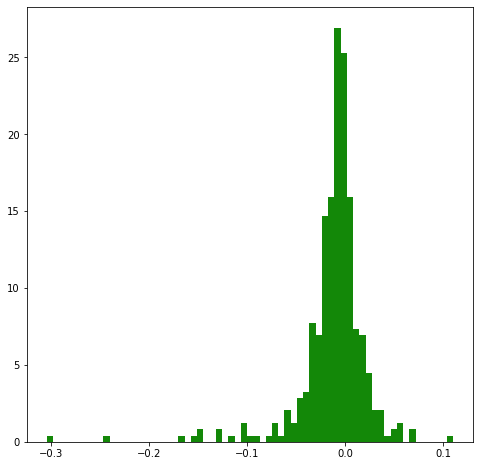

In [50]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(cluster_diff[0::2]), density = True, bins='auto', stacked = True, color = '#138808')
#x = np.linspace(hist[1].min(), hist[1].max(), num=100)
#plt.plot(x, stats.expon.pdf(x,0, 0.025), color ="orange")
plt.show()

In [51]:
np.mean(cluster_diff[0::2])

-0.012046117090782803

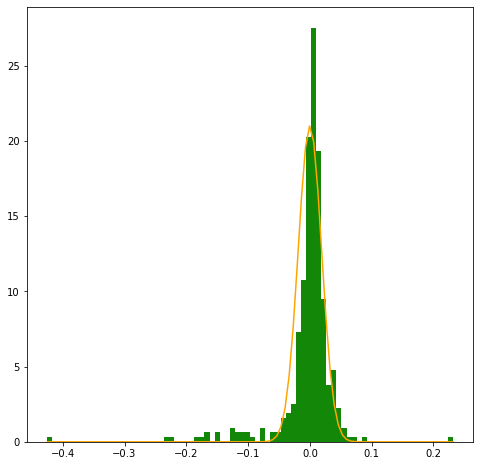

In [52]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(cluster_diff[1::2]), density = True, bins=80, stacked = True, color = '#138808')
#x = np.linspace(hist[1].min(), hist[1].max(), num=100)
#plt.plot(x, stats.expon.pdf(x,0, 0.03), color ="orange")
x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.norm.pdf(x, 0, 0.019), color ="orange")
plt.show()

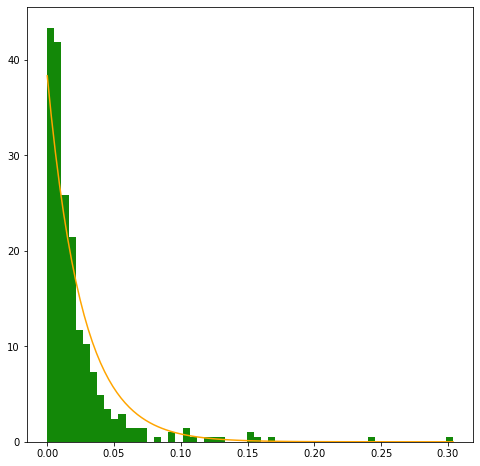

In [53]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(np.abs(cluster_diff[0::2])), density = True, bins='auto', stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.expon.pdf(x,0, 0.026), color ="orange")
plt.show()

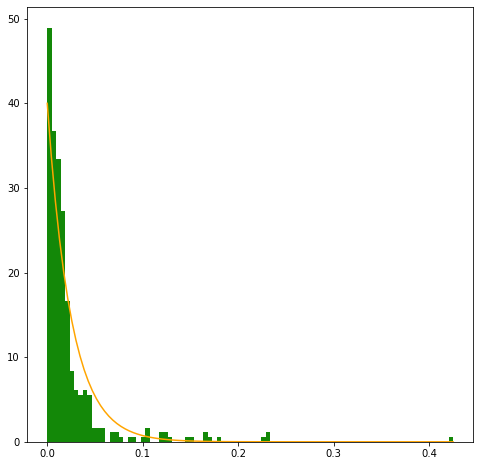

In [54]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(np.abs(cluster_diff[1::2])), density = True, bins='auto', stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.expon.pdf(x,0, 0.025), color ="orange")
plt.show()

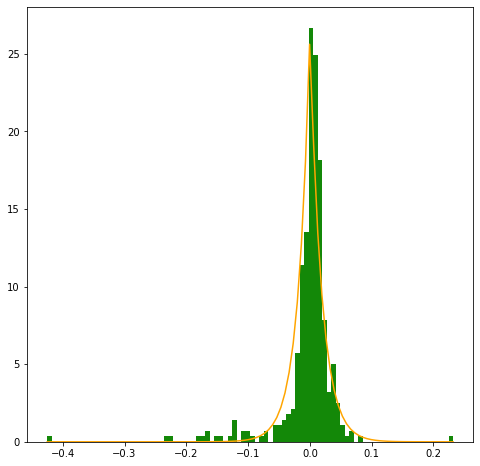

In [55]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(cluster_diff[1::2]), density = True, bins=90, stacked = True, color = '#138808')
#x = np.linspace(hist[1].min(), hist[1].max(), num=100)
#plt.plot(x, stats.expon.pdf(x,0, 0.03), color ="orange")
x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.laplace.pdf(x,0, 0.019), color ="orange")
plt.show()

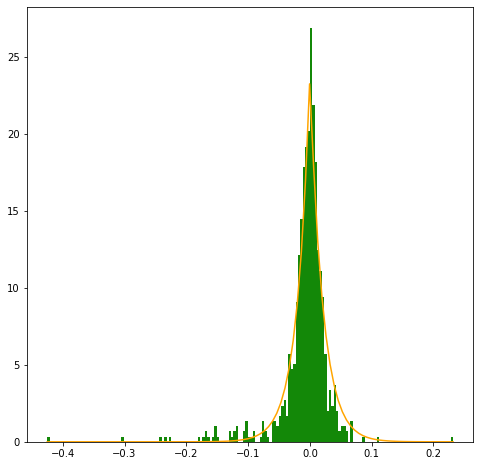

In [56]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(cluster_diff), density = True, bins=170, stacked = True, color = '#138808')
#x = np.linspace(hist[1].min(), hist[1].max(), num=100)
#plt.plot(x, stats.expon.pdf(x,0, 0.03), color ="orange")
x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.laplace.pdf(x,0, 0.021), color ="orange")
plt.show()